## Week One

Graded by:

1. A description of the problem and a discussion of the background. (15 marks)
2. A description of the data and how it will be used to solve the problem. (15 marks)

## Week Two

Graded by:

1. A link to your Notebook on your Github repository, showing your code. (15 marks)
2. A full report consisting of all of the following components (15 marks):

Introduction where you discuss the business problem and who would be interested in this project.

Data where you describe the data that will be used to solve the problem and the source of the data.

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

Results section where you discuss the results.

Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.

Conclusion section where you conclude the report.

3. Your choice of a presentation or blogpost. (10 marks)



# Introduction / Business Problem

### It is commonplace in most recommendation based sites to have tags. Tags are a form of metadata in the shape of words or phrases used to describe the content of a thread/website/image/etc. Usually tags are entered by the user, or poster of the content to customize recommendations. For example, when looking for Action movies, one can easily search Action to find many movies that have been "tagged" into that specific genre. Since the data is usually user entered, mistake can be made or tags can be missing. 

### There are many different ways to use Machine Learning to predict these tags. I will be using Latent Dirichlet Allocation (an unsupervised method of clustering language) to predict tags for resturaunts and other food-locations near Washington D.C.




# Data Section

### Please refer to the actual code below. I grabbed 50 (the limit of the free API) food-type locations from Washington D.C. and the surrounding area. Then used those locations to find the top two(once again the limit of the free API) tips for each resturaunts.

# Tag creation using Latent Dirochlet Allocation for recommendations in the DMV

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
# !conda install -c conda-forge geopy --yes 
from sklearn.cluster import KMeans
# !conda install -c conda-forge folium=0.5.0 --yes
import folium

from pandas.io.json import json_normalize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation





CLIENT_ID = 'CPZ3IZI3POLVKONVI1F1MA4AUFZEQEKG1HODGEKRXNFA1WLX' 
CLIENT_SECRET = '0Q1ZUIXMVFJIIRN221SSYBWYUSZIWZRJYJ1LUH4BNB2ROVMO' 
ACCESS_TOKEN = 'Q5XIKVYCSWCY5E0PMVZ3MKOXTD4BQ3WNQLORKNM0CXDM3YEN' 
VERSION = '20200604'
limit = 50
# Lots of warnings used
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
latitude = 38.9072
longitude = -77.0369
search_query = 'Resturaunt'
radius = 100000


url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&near={}&categoryId={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, 'DC', '4d4b7105d754a06374d81259',limit)
results = requests.get(url).json()
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,5582e635498ea0faf62e961f,Mom & Pop,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1623102870,False,2909 District Ave,District Ave & Strawberry Lane,38.872245,-77.229718,"[{'label': 'display', 'lat': 38.87224518516469...",...,United States,[2909 District Ave (District Ave & Strawberry ...,2185532,https://www.grubhub.com/restaurant/mom--pop-co...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
1,595d73005455b20451eddd61,Blue Bottle Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1623102870,False,1046 Potomac St NW,NaN,38.904379,-77.065437,"[{'label': 'display', 'lat': 38.90437920207734...",...,United States,"[1046 Potomac St NW, Washington, D.C. 20007]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44014894f964a5201d301fe3,Old Ebbitt Grill,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1623102870,False,675 15th St NW,at G St NW,38.897954,-77.033270,"[{'label': 'display', 'lat': 38.89795431833924...",...,United States,"[675 15th St NW (at G St NW), Washington, D.C....",2044356,https://www.grubhub.com/restaurant/old-ebbitt-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,79592812,NaN
3,5cd1bcfb04d1ae002c9eb498,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1623102870,False,362 Maple Ave E,NaN,38.906591,-77.259224,"[{'label': 'display', 'lat': 38.906591, 'lng':...",...,United States,"[362 Maple Ave E, Vienna, VA 22180]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4aee9310f964a52009d421e3,Krispy Kreme Doughnuts,"[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",v-1623102870,False,1350 Connecticut Ave NW,NaN,38.908712,-77.043208,"[{'label': 'display', 'lat': 38.9087119, 'lng'...",...,United States,"[1350 Connecticut Ave NW, Washington, D.C. 20036]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5207aa8111d28afd3b21cf3f,Bluejacket Brewery,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",v-1623102870,False,300 Tingey St SE,at 4th St SE,38.875169,-77.000773,"[{'label': 'display', 'lat': 38.87516890554908...",...,United States,"[300 Tingey St SE (at 4th St SE), Washington, ...",NaN,NaN,NaN,NaN,NaN,NaN,84401049,NaN
6,4ad51d14f964a520f50121e3,Shamshiry Chelo Kabob,"[{'id': '52e81612bcbc57f1066b79f7', 'name': 'P...",v-1623102870,False,8607 Westwood Center Dr,at Leesburg Pike,38.928682,-77.245535,"[{'label': 'display', 'lat': 38.92868235228419...",...,United States,"[8607 Westwood Center Dr (at Leesburg Pike), V...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,60b514409adc6d3e4311939d,Gigi’s Kitchen,"[{'id': '4eb1bd1c3b7b55596b4a748f', 'name': 'F...",v-1623102870,False,742 Cady Dr,NaN,38.759884,-76.995933,"[{'label': 'display', 'lat': 38.759884, 'lng':...",...,United States,"[742 Cady Dr, Ft. Washington, MD 20744]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,60b42a247b831004cda77b26,Poffy,"[{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...",v-1623102870,False,NaN,NaN,38.869790,-77.231199,"[{'label': 'display', 'lat': 38.86979, 'lng': ...",...,United States,"[Vienna, VA 22031]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5d73fa22d5d4230008b98efb,La Cosecha,"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",v-1623102870,False,1280 4th St NE,NaN,38.908826,-76.999737,"[{'label': 'display', 'lat': 38.908826, 'lng':...",...,United States,"[1280 4th St NE, Washington, D.C. 20002]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataframe.columns

Index(['id', 'name', 'categories', 'referralId', 'hasPerk', 'location.address',
       'location.crossStreet', 'location.lat', 'location.lng',
       'location.labeledLatLngs', 'location.distance', 'location.postalCode',
       'location.cc', 'location.city', 'location.state', 'location.country',
       'location.formattedAddress', 'delivery.id', 'delivery.url',
       'delivery.provider.name', 'delivery.provider.icon.prefix',
       'delivery.provider.icon.sizes', 'delivery.provider.icon.name',
       'venuePage.id', 'location.neighborhood'],
      dtype='object')

### In the future I will try to figure out how to get more than 50 outputs from the Fouresquare API. Maybe that is a premium feature

In [6]:
dataframe.shape

(50, 25)

In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Mom & Pop,Café,2909 District Ave,District Ave & Strawberry Lane,38.872245,-77.229718,"[{'label': 'display', 'lat': 38.87224518516469...",17153,22031,US,Fairfax,VA,United States,[2909 District Ave (District Ave & Strawberry ...,NaN,5582e635498ea0faf62e961f
1,Blue Bottle Coffee,Coffee Shop,1046 Potomac St NW,NaN,38.904379,-77.065437,"[{'label': 'display', 'lat': 38.90437920207734...",2491,20007,US,Washington,D.C.,United States,"[1046 Potomac St NW, Washington, D.C. 20007]",NaN,595d73005455b20451eddd61
2,Old Ebbitt Grill,American Restaurant,675 15th St NW,at G St NW,38.897954,-77.033270,"[{'label': 'display', 'lat': 38.89795431833924...",1076,20005,US,Washington,D.C.,United States,"[675 15th St NW (at G St NW), Washington, D.C....",NaN,44014894f964a5201d301fe3
3,Starbucks,Coffee Shop,362 Maple Ave E,NaN,38.906591,-77.259224,"[{'label': 'display', 'lat': 38.906591, 'lng':...",19258,22180,US,Vienna,VA,United States,"[362 Maple Ave E, Vienna, VA 22180]",NaN,5cd1bcfb04d1ae002c9eb498
4,Krispy Kreme Doughnuts,Donut Shop,1350 Connecticut Ave NW,NaN,38.908712,-77.043208,"[{'label': 'display', 'lat': 38.9087119, 'lng'...",571,20036,US,Washington,D.C.,United States,"[1350 Connecticut Ave NW, Washington, D.C. 20036]",NaN,4aee9310f964a52009d421e3
5,Bluejacket Brewery,Brewery,300 Tingey St SE,at 4th St SE,38.875169,-77.000773,"[{'label': 'display', 'lat': 38.87516890554908...",4744,20003,US,Washington,D.C.,United States,"[300 Tingey St SE (at 4th St SE), Washington, ...",NaN,5207aa8111d28afd3b21cf3f
6,Shamshiry Chelo Kabob,Persian Restaurant,8607 Westwood Center Dr,at Leesburg Pike,38.928682,-77.245535,"[{'label': 'display', 'lat': 38.92868235228419...",18227,22182,US,Vienna,VA,United States,"[8607 Westwood Center Dr (at Leesburg Pike), V...",NaN,4ad51d14f964a520f50121e3
7,Gigi’s Kitchen,Filipino Restaurant,742 Cady Dr,NaN,38.759884,-76.995933,"[{'label': 'display', 'lat': 38.759884, 'lng':...",16779,20744,US,Ft. Washington,MD,United States,"[742 Cady Dr, Ft. Washington, MD 20744]",NaN,60b514409adc6d3e4311939d
8,Poffy,Dessert Shop,NaN,NaN,38.869790,-77.231199,"[{'label': 'display', 'lat': 38.86979, 'lng': ...",17342,22031,US,Vienna,VA,United States,"[Vienna, VA 22031]",NaN,60b42a247b831004cda77b26
9,La Cosecha,Market,1280 4th St NE,NaN,38.908826,-76.999737,"[{'label': 'display', 'lat': 38.908826, 'lng':...",3224,20002,US,Washington,D.C.,United States,"[1280 4th St NE, Washington, D.C. 20002]",NaN,5d73fa22d5d4230008b98efb


### Map of 50 food locations in the DMV

In [8]:
map_dc = folium.Map(location=[latitude, longitude], zoom_start=11)

#add markers to map
for lat, lng, name, address in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['name'], dataframe_filtered['address']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dc)  
    
map_dc

### Grab tip data for corresponding food locations

In [11]:
tips_df = pd.DataFrame()
for venue,name in zip(venue_id,dataframe_filtered.name):
    try:
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue, CLIENT_ID, CLIENT_SECRET, VERSION)
        results = requests.get(url).json()
        venues = results['response']['venue']['tips']['groups'][0]['items']
        tips_data = json_normalize(venues)
        tips_data['name'] = name
        tips_df = tips_df.append(tips_data)
    except:
        pass


/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


In [12]:
tips_df.reset_index(inplace=True)
tips_df.drop('index', axis=1, inplace=True)

### Take only relevant information (text, and resturaunt). This will be a lot more efficient if I could pull from more than two tips per resturaunt.

In [14]:
tips_df_filtered = tips_df[['id','name','text']]

### Pipeline TFIDF into Latent Dirochlet Allocation to find latent groups out of the store comments

In [18]:
tfidf = TfidfVectorizer(strip_accents='ascii', 
                        stop_words='english', 
                        max_features = 1000)
vectorized_tfidf = tfidf.fit_transform(tips_df_filtered.text)
feature_names = tfidf.get_feature_names()

lda_model = LatentDirichletAllocation(n_components=10, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0,
                                        n_jobs=-1).fit(vectorized_tfidf)

lda_model

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_jobs=-1, random_state=0)

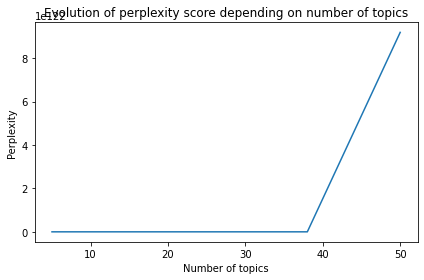

In [34]:
best_perplexity = np.inf
best_lda = 0
perplexity_list = []
n_topics_list = []

for n_topics in np.linspace(5, 50, 5, dtype='int'):
    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(vectorized_tfidf)
    n_topics_list.append(n_topics)
    perplexity = lda_model.perplexity(vectorized_tfidf)
    perplexity_list.append(perplexity)

    # Perplexity: The smaller the better
    if perplexity <= best_perplexity:
        best_perplexity = perplexity
        best_lda = lda_model
                                
plt.title("Evolution of perplexity score depending on number of topics")
plt.xlabel("Number of topics")
plt.ylabel("Perplexity")
plt.plot(n_topics_list, perplexity_list)
plt.tight_layout()
plt.show()
    

In [35]:
best_lda

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

### Due to small and limited dataset, many of these topics do not make sense. Occasionally patterns do exist.

In [19]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10
display_topics(lda_model, feature_names, num_top_words)

Topic 0:
great pizza food service subs chic shamshiry hotel exterior hookah
Topic 1:
free green choose water bread just awesome feeling sauce late
Topic 2:
smoothies tastes fruit hagel barista messy cool face tarts reasonable
Topic 3:
delicious fresh honey fine espresso known caffeine coffee scene thyme
Topic 4:
water sliders tiramisu darn vibe deferent ship choice secretary ask
Topic 5:
compass try amazing coffee skewer buy latte meat kubideh oat
Topic 6:
coffee place good menu hookah great got mousse american peach
Topic 7:
new home carmelized clubbing jalapeno poppers fennel fudge whopping open
Topic 8:
bagel eaten ve hell skinny american ordinary scene best spread
Topic 9:
change drip avocado scene came life kegs chuck herbs super


### A single pipeline that inputs a comment and returns suggested keywords based off of a LDA threshold

In [22]:
def Recommend_tags_lda(text, X):

    n_topics = 10
    threshold = 0.001
    list_scores = []
    list_words = []
    used = set()

    vectorizer_text = TfidfVectorizer(strip_accents='ascii', 
                        stop_words='english', 
                        max_features = 1000)
    vectorizer_text.fit(X)
    text_tfidf = vectorizer_text.transform([text])
    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0,
                                         n_jobs=-1).fit(vectorized_tfidf)
    text_projection = lda_model.transform(text_tfidf)
    feature_names = vectorizer_text.get_feature_names()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for topic in range(n_topics):
        topic_score = text_projection[0][topic]

        for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
            score = topic_score*word_score

            if score >= threshold:
                list_scores.append(score)
                list_words.append(feature_names[word_idx])
                used.add(feature_names[word_idx])

    results = [tag for (y,tag) in sorted(zip(list_scores,list_words), key=lambda pair: pair[0], reverse=True)]
    unique_results = [x for x in results if x not in used] # get only unique tags
    tags = " ".join(results[:5])

    return tags

### Interesting, the model believes that the mention of breakfast sandwiches returns a "coffee" tag

In [37]:
for i in range(5):
    tags = Recommend_tags_lda(tips_df_filtered.text[i], tips_df_filtered.text)
    text = tips_df_filtered.text[i]
    print(f'Text entered : {text}')
    print(f'Suggested tags : {tags}')

Text entered : The croissant breakfast sandwiches are amazing. Get the one with the baked egg, ham and cheese. Less messy, more delicious.
Suggested tags : compass try amazing coffee
Text entered : Love their cappuccino! The place is very cozy and attractive. I wish they have different kind of breads to choose from.
Suggested tags : coffee place good menu
Text entered : Awesome coffee and green tea in glass cups
Suggested tags : free green choose water
Text entered : Coffee latte with oat milk
Suggested tags : compass try amazing coffee
Text entered : Raw Bar HH will change your life
Suggested tags : change drip avocado scene
